In [1]:
import os
project_root_path=os.path.abspath(os.path.join(os.path.dirname('__file__'),'..'))

print(project_root_path)

/media/sutanu/wd_sn_costello_lab/project/omni_PLIER/penalized_regression


In [2]:
import pandas as pd

obesity_res_path=os.path.join(project_root_path, '2_t21_d21_bmi_plier_lvs_w_bc', 'output','features_w_elas_net_coeff','BMI_feature_w_ela_net.csv')
obesity_df=pd.read_csv(obesity_res_path)

obesity_df=obesity_df.rename(columns={'feat_w_ela_net_coeff':'feat_w_ela_net_coeff_obesity'})
obesity_df.head(2)

,feature_name,feat_w_ela_net_coeff_obesity
0,"72,xCell:Erythrocytes_BLUEPRINT_2",0.828098
1,"37,ZHAN_V1_LATE_DIFFERENTIATION_GENES_UP",0.660744


In [3]:
karyotype_res_path=os.path.join(project_root_path, '1_t21_d21_karyotype_plier_lvs_w_bc', 'output','features_w_elas_net_coeff','Karyotype_feature_w_ela_net.csv')
karyotype_df=pd.read_csv(karyotype_res_path)

karyotype_df=karyotype_df.rename(columns={'feat_w_ela_net_coeff':'feat_w_ela_net_coeff_karyotype'})
karyotype_df.head(2)

,feature_name,feat_w_ela_net_coeff_karyotype
0,"76,GSE22886_NAIVE_BCELL_VS_NEUTROPHIL_DN",0.878348
1,"68,TIEN_INTESTINE_PROBIOTICS_6HR_UP",0.607123


In [4]:
merge_karyotype_obesity=karyotype_df.merge(obesity_df, how='inner', on=['feature_name'])

In [5]:
merge_karyotype_obesity['feat_w_ela_net_coeff_karyotype']=abs(merge_karyotype_obesity['feat_w_ela_net_coeff_karyotype'])
merge_karyotype_obesity['feat_w_ela_net_coeff_obesity']=abs(merge_karyotype_obesity['feat_w_ela_net_coeff_obesity'])
#merge_karyotype_obesity=merge_karyotype_obesity.sort_values(by='feat_w_ela_net_coeff_obesity', ascending=False)
display(merge_karyotype_obesity)

,feature_name,feat_w_ela_net_coeff_karyotype,feat_w_ela_net_coeff_obesity
0,"76,GSE22886_NAIVE_BCELL_VS_NEUTROPHIL_DN",0.878348,0.216954
1,"68,TIEN_INTESTINE_PROBIOTICS_6HR_UP",0.607123,0.135290
2,"3,TIEN_INTESTINE_PROBIOTICS_2HR_UP",0.605170,0.434881
3,"99,ZHAN_V1_LATE_DIFFERENTIATION_GENES_UP",0.529723,0.558718
4,"89,PID_IL6_7PATHWAY",0.417186,0.438367
...,...,...,...
112,"45,GNATENKO_PLATELET_SIGNATURE",0.595349,0.020446
113,"13,REACTOME_PEPTIDE_CHAIN_ELONGATION",0.601648,0.129461
114,"14,MACLACHLAN_BRCA1_TARGETS_DN",0.602291,0.153923
115,"56,LIANG_HEMATOPOIESIS_STEM_CELL_NUMBER_QTL",0.610908,0.621085


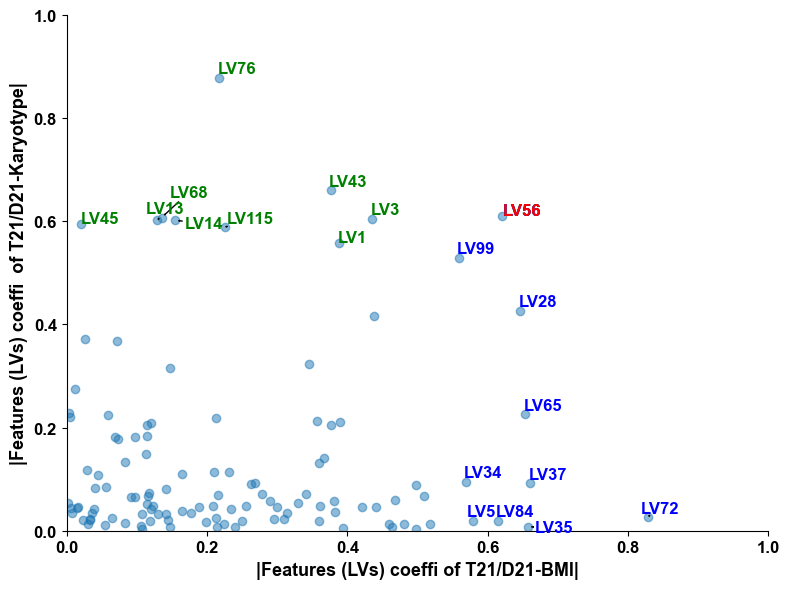

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp

from adjustText import adjust_text

res_plot="./output/comparion_faeture_ranking_coefficient_D21_T21_BMI_Karyotype_v4.pdf"
ax = plt.subplot(111)
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["font.family"] = "Arial"


r, p = sp.stats.pearsonr(merge_karyotype_obesity['feat_w_ela_net_coeff_obesity'], merge_karyotype_obesity['feat_w_ela_net_coeff_karyotype'])

ax.scatter(merge_karyotype_obesity['feat_w_ela_net_coeff_obesity'], merge_karyotype_obesity['feat_w_ela_net_coeff_karyotype'],alpha=0.5)




merge_karyotype_obesity[['LVs','LVs_name']] = merge_karyotype_obesity['feature_name'].str.split(',',expand=True)

merge_karyotype_obesity['LVs'] = 'LV' + merge_karyotype_obesity['LVs'].astype(str)

sorted_karyotype = merge_karyotype_obesity.sort_values(by=['feat_w_ela_net_coeff_karyotype'], ascending=False)
top_10_row_karyotype = sorted_karyotype.head(10)
top_10_row_index_karyotype=top_10_row_karyotype.index

sorted_obesity = merge_karyotype_obesity.sort_values(by=['feat_w_ela_net_coeff_obesity'], ascending=False)
top_10_row_obesity = sorted_obesity.head(10)

top_10_row_index_obesity=top_10_row_obesity.index

common_id_karyo_type_obesity=list(set(top_10_row_index_karyotype) & set(top_10_row_index_obesity))


#------annotation LVs by color ---------------------------------------
texts = []
for index, x, y, s in zip(merge_karyotype_obesity.index,merge_karyotype_obesity['feat_w_ela_net_coeff_obesity'], merge_karyotype_obesity['feat_w_ela_net_coeff_karyotype'],merge_karyotype_obesity['LVs']):
    #print(index)
    if index in top_10_row_index_karyotype:
        texts.append(plt.text(x, y, s, fontsize=12, fontweight='bold', color='green'))
        
     #print(index)
    if index in top_10_row_index_obesity:
        texts.append(plt.text(x, y, s, fontsize=12, fontweight='bold', color='blue'))
        
     #print(index)
    if index in common_id_karyo_type_obesity:
        texts.append(plt.text(x, y, s, fontsize=12, fontweight='bold', color='red'))
       
        
    

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=1.0))   
    
plt.ylabel("|Features (LVs) coeffi  of T21/D21-Karyotype|", fontsize=13, fontweight='bold')
plt.xlabel("|Features (LVs) coeffi of T21/D21-BMI|", fontsize=13, fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.axhline(y=0.50,linewidth=1.5, color='black', linestyle = 'dotted')
#ax.axvline(x=0.5,linewidth=1.5, color='black', linestyle = 'dotted')



#ax.ayhline(x=0.05,linewidth=1, color='r')

#adjust_text(texts)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.savefig(res_plot, bbox_inches = 'tight', dpi=300)
plt.show()